In [113]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression as LR
from keras.datasets import mnist
import itertools
import codecs

# for MNIST

In [107]:
with open("tsallis_log.txt") as f:
    l = f.readlines()

In [108]:
counts_all = []
for x in [1, 3, 9, 11, 13, 19, 21]:
    all_labels = eval(l[x])

    counts = [0 for _ in range(9)]
    for labels in all_labels:
        n = len(labels)
        counts[n - 1] += 1

    counts_all.append(counts)
    print(counts)

[0, 0, 0, 0, 0, 0, 0, 0, 2000]
[8, 55, 204, 370, 455, 440, 282, 152, 34]
[1233, 623, 128, 15, 1, 0, 0, 0, 0]
[1589, 377, 32, 2, 0, 0, 0, 0, 0]
[1714, 268, 17, 1, 0, 0, 0, 0, 0]
[1903, 93, 4, 0, 0, 0, 0, 0, 0]
[2000, 0, 0, 0, 0, 0, 0, 0, 0]


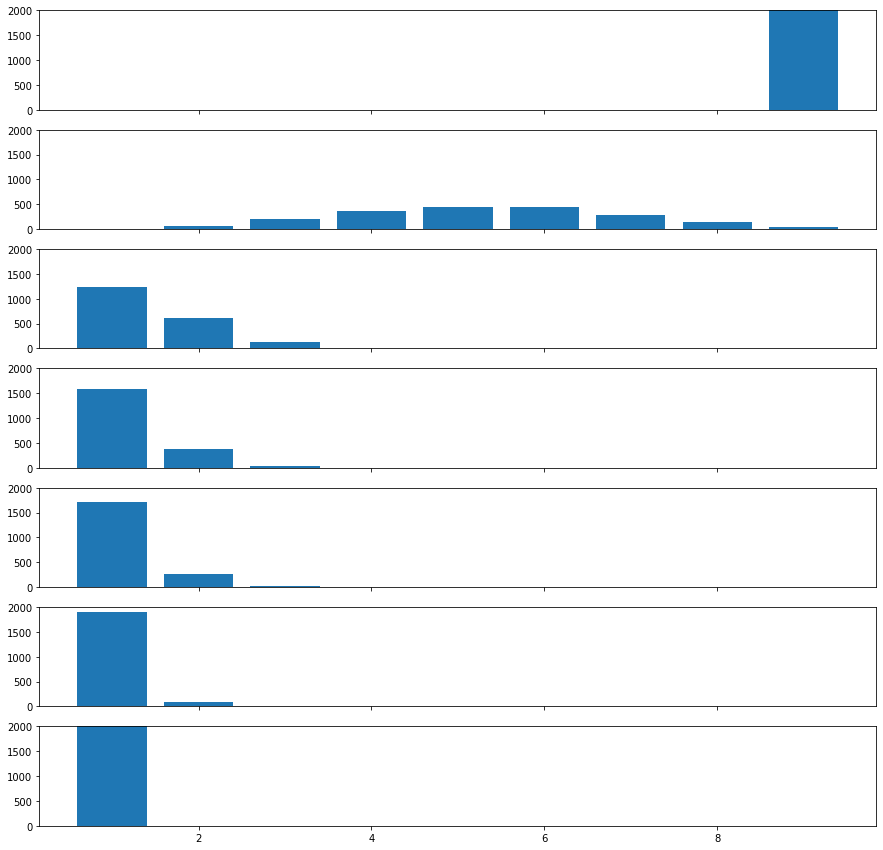

In [109]:
fig, axs = plt.subplots(len(counts_all), sharex = True, sharey = True, figsize = (15, 15))
lnum = [i for i in range(1, 10, 1)]
for g, counts in enumerate(counts_all):
    axs[g].bar(lnum, counts)
    axs[g].set_ylim([0, 2000])
fig.savefig("label-dist_mnist.pdf")

## 1. 真のラベルを含むか否かで分割

In [94]:
true_labels = eval(l[23])

all_suc_counts = []
all_fail_counts = []

for x in [1, 3, 9, 11, 13, 19, 21]:
    all_labels = eval(l[x])
    
    s_counts, f_counts = [0 for _ in range(9)], [0 for _ in range(9)]
    for labels, t_label in zip(all_labels, true_labels):
        n = len(labels)
        if t_label in labels:
            s_counts[n - 1] += 1
        else:
            f_counts[n - 1] += 1
    
    all_suc_counts.append(s_counts)
    all_fail_counts.append(f_counts)

### 1.1 for succeeded instances

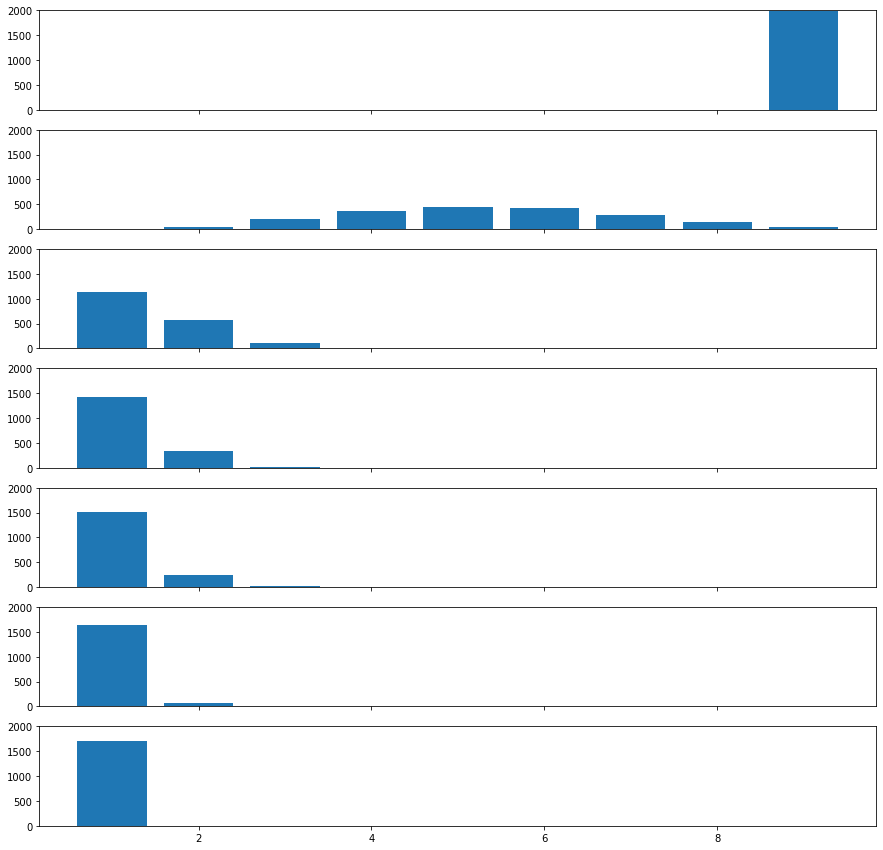

In [95]:
fig, axs = plt.subplots(len(all_suc_counts), sharex = True, sharey = True, figsize = (15, 15))
lnum = [i for i in range(1, 10, 1)]
for g, counts in enumerate(all_suc_counts):
    axs[g].bar(lnum, counts)
    axs[g].set_ylim([0, 2000])

### 1.2 for failed instances

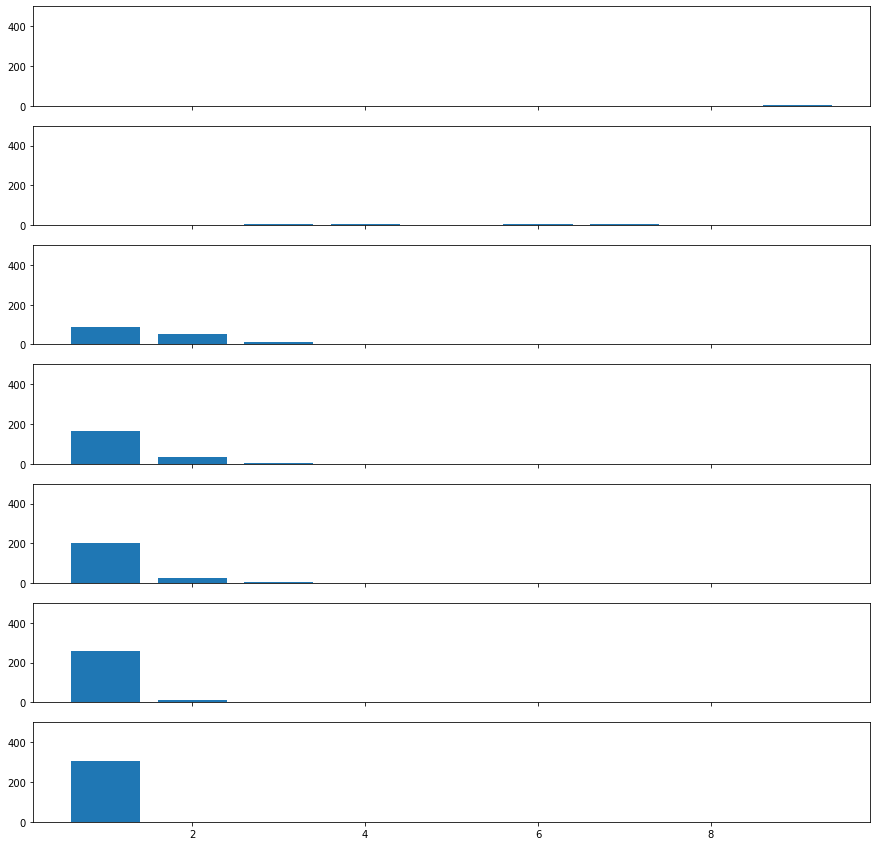

In [96]:
fig, axs = plt.subplots(len(all_fail_counts), sharex = True, sharey = True, figsize = (15, 15))
lnum = [i for i in range(1, 10, 1)]
for g, counts in enumerate(all_fail_counts):
    axs[g].bar(lnum, counts)
    axs[g].set_ylim([0, 500])

## 2. top-1で正解したか否かで分割

In [97]:
top1_labels = [e[0] for e in eval(l[21])]
true_labels = eval(l[23])
flag_list = [0 if (a_label != t_label) else 1 for a_label, t_label in zip(top1_labels, true_labels)]

In [98]:
all_suc_counts = []
all_fail_counts = []

for x in [1, 3, 9, 11, 13, 19, 21]:
    all_labels = eval(l[x])
    s_counts, f_counts = [0 for _ in range(9)], [0 for _ in range(9)]
    for i, labels in enumerate(all_labels):
        n = len(labels)
        if flag_list[i] == 0:
            f_counts[n - 1] += 1
        else:
            s_counts[n - 1] += 1
            
    all_suc_counts.append(s_counts)
    all_fail_counts.append(f_counts)

### 2.1 for succeeded instances

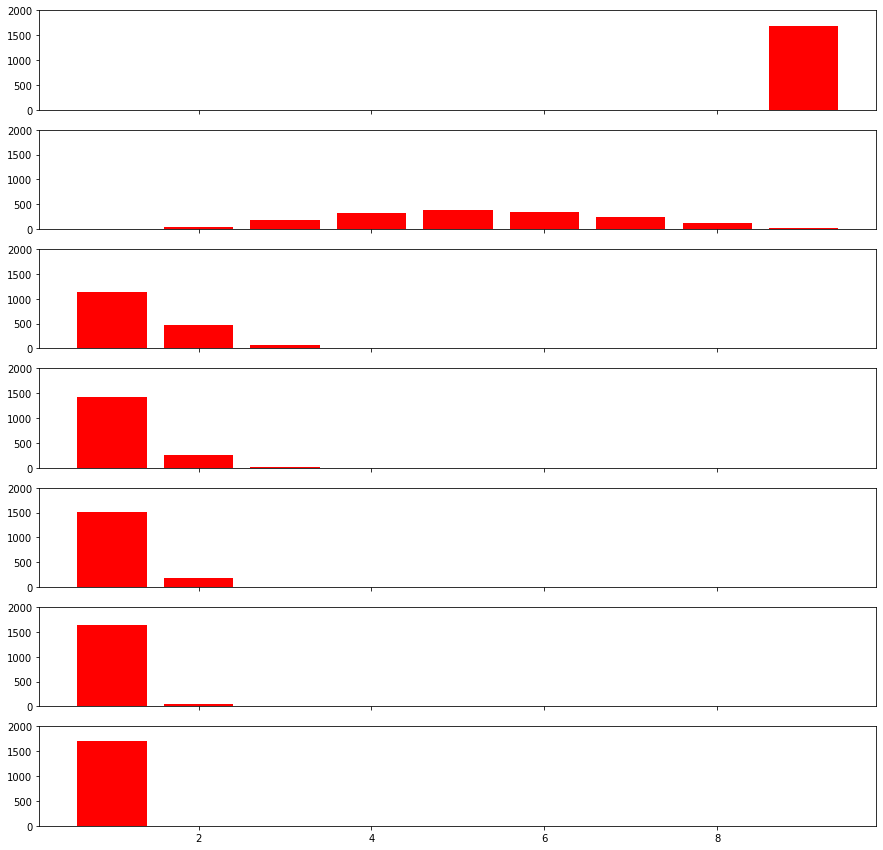

In [102]:
fig, axs = plt.subplots(len(all_suc_counts), sharex = True, sharey = True, figsize = (15, 15))
lnum = [i for i in range(1, 10, 1)]
for g, counts in enumerate(all_suc_counts):
    axs[g].bar(lnum, counts, color = "red")
    axs[g].set_ylim([0, 2000])

### 2.2 for failed instances

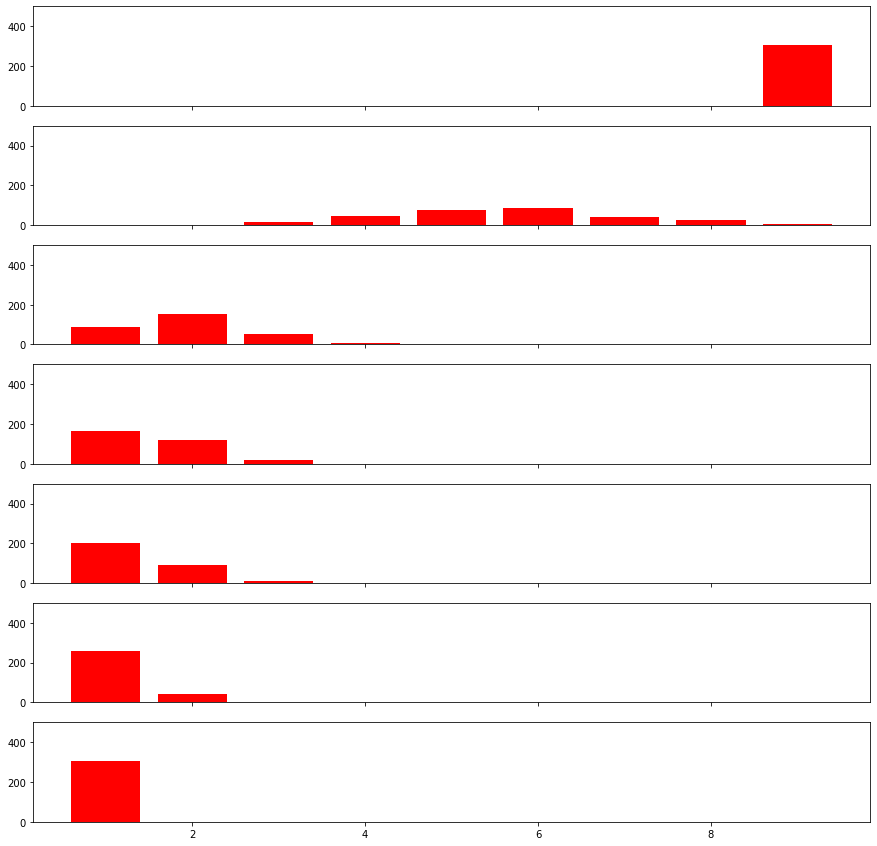

In [103]:
fig, axs = plt.subplots(len(all_fail_counts), sharex = True, sharey = True, figsize = (15, 15))
lnum = [i for i in range(1, 10, 1)]
for g, counts in enumerate(all_fail_counts):
    axs[g].bar(lnum, counts, color = "red")
    axs[g].set_ylim([0, 500])

# for Fashion MNIST

In [110]:
with open("tsallis_fmnist_log.txt") as f:
    l = f.readlines()

In [111]:
counts_all = []
for x in [1, 3, 9, 11, 13, 19, 21]:
    all_labels = eval(l[x])

    counts = [0 for _ in range(9)]
    for labels in all_labels:
        n = len(labels)
        counts[n - 1] += 1

    counts_all.append(counts)
    print(counts)

[0, 0, 0, 0, 0, 0, 0, 0, 2000]
[1, 22, 84, 308, 466, 572, 395, 128, 24]
[997, 759, 202, 39, 3, 0, 0, 0, 0]
[1492, 441, 62, 4, 1, 0, 0, 0, 0]
[1653, 309, 36, 2, 0, 0, 0, 0, 0]
[1876, 109, 14, 1, 0, 0, 0, 0, 0]
[2000, 0, 0, 0, 0, 0, 0, 0, 0]


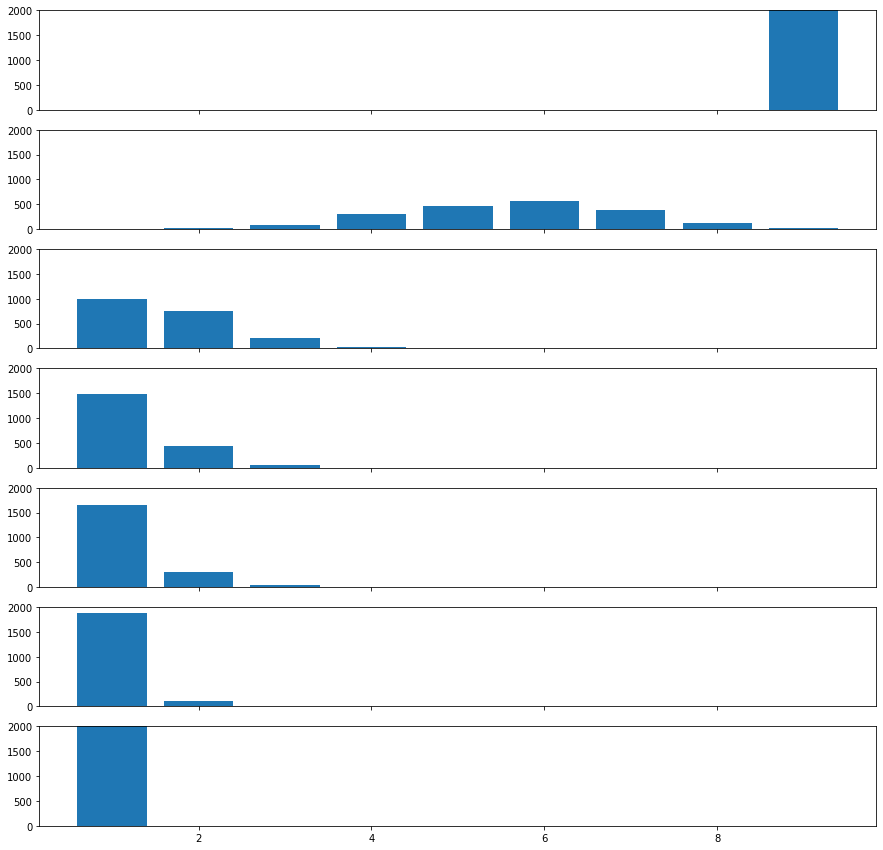

In [112]:
fig, axs = plt.subplots(len(counts_all), sharex = True, sharey = True, figsize = (15, 15))
lnum = [i for i in range(1, 10, 1)]
for g, counts in enumerate(counts_all):
    axs[g].bar(lnum, counts)
    axs[g].set_ylim([0, 2000])
fig.savefig("label-dist_fmnist.pdf")